# Auto Accidents in Texas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
accident_data_to_load = "../data/outTX.csv"

tx_accident_data = pd.read_csv(accident_data_to_load)
tx_accident_data.drop("Unnamed: 0", axis=1, inplace=True)

In [3]:
tx_accident_data

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,m_start,m_end,s_start,s_end,sec_start,sec_end,duration,season_start,season_end,day_of_week
0,A-267712,MapQuest,201.0,2,2017-01-02 14:40:12,2017-01-02 15:39:53,30.393579,-97.745979,NaN,NaN,...,40,39,12,53,52812,56393,3581,winter,1,Monday
1,A-267713,MapQuest,201.0,2,2017-01-02 14:28:48,2017-01-02 15:28:36,30.256216,-97.722038,NaN,NaN,...,28,28,48,36,52128,55716,3588,winter,1,Monday
2,A-267714,MapQuest,201.0,2,2017-01-02 14:04:17,2017-01-02 15:05:00,30.418287,-97.700874,NaN,NaN,...,4,5,17,0,50657,54300,3643,winter,1,Monday
3,A-267715,MapQuest,201.0,2,2017-01-02 14:29:13,2017-01-02 15:35:00,30.237938,-97.696167,NaN,NaN,...,29,35,13,0,52153,56100,3947,winter,1,Monday
4,A-267716,MapQuest,201.0,2,2017-01-02 14:40:51,2017-01-02 15:40:23,30.364882,-97.695992,NaN,NaN,...,40,40,51,23,52851,56423,3572,winter,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248293,A-3513513,Bing,NaN,2,2019-08-23 13:16:19,2019-08-23 13:45:28,29.749589,-95.456110,29.742630,-95.457930,...,16,45,19,28,47779,49528,1749,summer,8,Friday
248294,A-3513514,Bing,NaN,3,2019-08-23 13:04:19,2019-08-23 13:33:52,29.778089,-95.373146,29.774183,-95.368235,...,4,33,19,52,47059,48832,1773,summer,8,Friday
248295,A-3513515,Bing,NaN,3,2019-08-23 13:00:34,2019-08-23 13:30:14,29.774190,-95.320940,29.774180,-95.312270,...,0,30,34,14,46834,48614,1780,summer,8,Friday
248296,A-3513517,Bing,NaN,3,2019-08-23 16:44:23,2019-08-23 17:11:49,29.941686,-95.295187,29.926120,-95.302110,...,44,11,23,49,60263,61909,1646,summer,8,Friday


In [4]:
# Column names in df
for col in tx_accident_data.columns: 
    print(col) 

ID
Source
TMC
Severity
Start_Time
End_Time
Start_Lat
Start_Lng
End_Lat
End_Lng
Distance(mi)
Description
Number
Street
Side
City
County
State
Zipcode
Country
Timezone
Airport_Code
Weather_Timestamp
Temperature(F)
Wind_Chill(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Wind_Direction
Wind_Speed(mph)
Precipitation(in)
Weather_Condition
Amenity
Bump
Crossing
Give_Way
Junction
No_Exit
Railway
Roundabout
Station
Stop
Traffic_Calming
Traffic_Signal
Turning_Loop
Sunrise_Sunset
Civil_Twilight
Nautical_Twilight
Astronomical_Twilight
Year
start
end
tss
tse
year_start
year_end
month_start
month_end
day_start
day_end
time_start
time_end
h_start
h_end
m_start
m_end
s_start
s_end
sec_start
sec_end
duration
season_start
season_end
day_of_week


# Traffic Amenities Involved in Auto Accidents in Texas from 2017-2019

In [5]:
# filter to columns for amenity analysis

amenity_data = tx_accident_data[["ID", "TMC", "Severity", "Number", "Street", "City", "County", "State", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop", "year_start"]]
amenity_data

,ID,TMC,Severity,Number,Street,City,County,State,Bump,Crossing,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,year_start
0,A-267712,201.0,2,10191.0,Research Blvd,Austin,Travis,TX,False,False,...,False,False,False,False,False,False,False,False,False,2017
1,A-267713,201.0,2,2040.0,E Cesar Chavez St,Austin,Travis,TX,False,False,...,False,False,False,False,False,False,False,False,False,2017
2,A-267714,201.0,2,12498.0,Tomanet Trl,Austin,Travis,TX,False,False,...,False,False,False,False,False,False,False,False,False,2017
3,A-267715,201.0,2,6203.0,Ponca St,Austin,Travis,TX,False,False,...,False,False,False,False,False,False,False,False,False,2017
4,A-267716,201.0,2,9515.0,N Lamar Blvd,Austin,Travis,TX,False,False,...,False,False,False,False,False,False,False,True,False,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248293,A-3513513,NaN,2,NaN,I-610 S,Houston,Harris,TX,False,False,...,False,False,False,False,False,False,False,False,False,2019
248294,A-3513514,NaN,3,NaN,I-10 E,Houston,Harris,TX,False,False,...,False,False,False,False,False,False,False,False,False,2019
248295,A-3513515,NaN,3,NaN,US-90 E,Houston,Harris,TX,False,False,...,False,False,False,False,False,False,False,False,False,2019
248296,A-3513517,NaN,3,NaN,US-59 N,Humble,Harris,TX,False,False,...,False,False,False,False,False,False,False,False,False,2019


In [6]:
# isolate amentiy 

isolated_amenity_data = tx_accident_data[[ "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]]

In [7]:
# clear any possible NaN valuse

clean_isolated_amenity_data = isolated_amenity_data.dropna()

In [8]:
# Find total per traffic amenity

# total number of accidents per traffic amentiy
bumps = clean_isolated_amenity_data.Bump.sum()
crossings = clean_isolated_amenity_data.Crossing.sum()
give_ways = clean_isolated_amenity_data.Give_Way.sum()
junctions = clean_isolated_amenity_data.Junction.sum()
no_exits = clean_isolated_amenity_data.No_Exit.sum()
railways = clean_isolated_amenity_data.Railway.sum()
roundabouts = clean_isolated_amenity_data.Roundabout.sum()
stations = clean_isolated_amenity_data.Station.sum()
stops = clean_isolated_amenity_data.Stop.sum()
traffic_calming = clean_isolated_amenity_data.Traffic_Calming.sum()
traffic_signals = clean_isolated_amenity_data.Traffic_Signal.sum()
turning_loops = clean_isolated_amenity_data.Turning_Loop.sum()

#total accidnets involving traffic amenities
total_accidents_involving_amenities = bumps + crossings + give_ways + junctions + no_exits + railways + roundabouts + stations + stops + traffic_calming + traffic_signals + turning_loops 

In [9]:
# get number of accidents in TX
total_accidents = len(clean_isolated_amenity_data)

# find % of accidents at amenities
pct_bump = (bumps / total_accidents) * 100
pct_crossing = (crossings / total_accidents) * 100
pct_giveway = (give_ways / total_accidents) * 100
pct_junction = (junctions / total_accidents) * 100
pct_no_exit = (no_exits / total_accidents) * 100
pct_railway = (railways / total_accidents) * 100
pct_roundabout = (roundabouts / total_accidents) * 100
pct_station = (stations / total_accidents) * 100
pct_stop = (stops / total_accidents) * 100
pct_traffic_calming = (traffic_calming / total_accidents) * 100
pct_traffic_signal = (traffic_signals / total_accidents) * 100
# #pct_turning_loop = (turning_loops / total_accidents) * 100 # all false

print(f"The % of accidents at bumps is: " + str(pct_bump) + "%")
print(f"The % of accidents at crossings is: " + str(pct_crossing) + "%")
print(f"The % of accidents at give-ways is: " + str(pct_giveway) + "%")
print(f"The % of accidents at junctions is: " + str(pct_junction) + "%")
print(f"The % of accidents at no exits is: " + str(pct_no_exit) + "%")
print(f"The % of accidents at railways is: " + str(pct_railway) + "%")
print(f"The % of accidents at roundabouts is: " + str(pct_roundabout) + "%")
print(f"The % of accidents at rail stations is: " + str(pct_station) + "%")
print(f"The % of accidents at stop signs is: " + str(pct_stop) + "%")
print(f"The % of accidents at traffic calming amenities is: " + str(pct_traffic_calming) + "%")
print(f"The % of accidents at traffic signals is: " + str(pct_traffic_signal) + "%")
print(f"The % of accidents at turning loops is: 0%")


The % of accidents at bumps is: 0.016915158398376144%
The % of accidents at crossings is: 7.736268516057318%
The % of accidents at give-ways is: 0.6109594116746813%
The % of accidents at junctions is: 5.13375057390716%
The % of accidents at no exits is: 0.11598965758886501%
The % of accidents at railways is: 0.9633585449741843%
The % of accidents at roundabouts is: 0.004430160532908038%
The % of accidents at rail stations is: 1.519142320920829%
The % of accidents at stop signs is: 1.875568872886612%
The % of accidents at traffic calming amenities is: 0.037857735463032324%
The % of accidents at traffic signals is: 28.903575542291925%
The % of accidents at turning loops is: 0%


By far, the most common traffic/safety amentiy involved in car accidents in texas were traffic signals.

In [10]:
amenity_involvement_df = pd.DataFrame({"Total Bumps": [bumps],
              "Total Crossings": [crossings],
              "Total Give_Ways": [give_ways],
              "Total Junctions": [junctions],
              "Total No_Exits": [no_exits],
              "Total Railways": [railways],
              "Total Roundabouts": [roundabouts],
              "Total Rail Stations": [stations],
              "Total Stops": [stops],
              "Total Traffic_Calmings": [traffic_calming],
              "Total Traffic_Signal": [traffic_signals],
              "Total Turning _Loops": [turning_loops]
})
amenity_involvement_df

,Total Bumps,Total Crossings,Total Give_Ways,Total Junctions,Total No_Exits,Total Railways,Total Roundabouts,Total Rail Stations,Total Stops,Total Traffic_Calmings,Total Traffic_Signal,Total Turning _Loops
0,42,19209,1517,12747,288,2392,11,3772,4657,94,71767,0


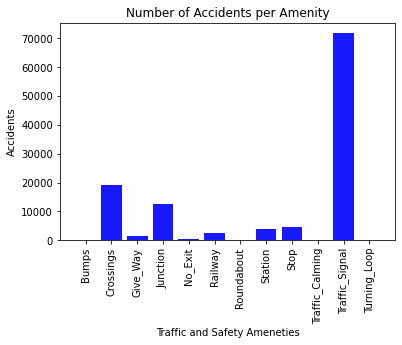

In [11]:
# Bar Chart for distribution of traffic control and safety amenities

amenity_involvement = [bumps, crossings, give_ways, junctions, no_exits, railways, roundabouts, stations, stops, traffic_calming, traffic_signals, turning_loops]

x_axis = np.arange(len(amenity_involvement))
tick_locations = [value for value in x_axis]


plt.bar(x_axis, amenity_involvement, color='blue', alpha=.9, align="center")
plt.xticks(tick_locations, ["Bumps", "Crossings", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"])
plt.xticks(rotation=90)

plt.xlabel("Traffic and Safety Ameneties")
plt.ylabel("Accidents")
plt.title("Number of Accidents per Amenity")
plt.savefig("../Images/accidents_per_amenity.png")
plt.show()

Based on the bar chart, it is clear traffic signals drawrf any other safety amenity in terms of accident involvement.

# Accidents over a 24 hour period

In [12]:
#time of day data
time_of_day_data = tx_accident_data[["Severity","Start_Lat", "Start_Lng", "Sunrise_Sunset", "Civil_Twilight", "Nautical_Twilight", "Astronomical_Twilight", "season_start", "h_start"]]
time_of_day_data

,Severity,Start_Lat,Start_Lng,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,season_start,h_start
0,2,30.393579,-97.745979,Day,Day,Day,Day,winter,14
1,2,30.256216,-97.722038,Day,Day,Day,Day,winter,14
2,2,30.418287,-97.700874,Day,Day,Day,Day,winter,14
3,2,30.237938,-97.696167,Day,Day,Day,Day,winter,14
4,2,30.364882,-97.695992,Day,Day,Day,Day,winter,14
...,...,...,...,...,...,...,...,...,...
248293,2,29.749589,-95.456110,Day,Day,Day,Day,summer,13
248294,3,29.778089,-95.373146,Day,Day,Day,Day,summer,13
248295,3,29.774190,-95.320940,Day,Day,Day,Day,summer,13
248296,3,29.941686,-95.295187,Day,Day,Day,Day,summer,16


In [13]:
# percent of accidents happening at day and night
sunrise_sunset = time_of_day_data.groupby(["Sunrise_Sunset"]).size()
civil_twilight = time_of_day_data.groupby(["Civil_Twilight"]).size()
nautical_twilight = time_of_day_data.groupby(["Nautical_Twilight"]).size()
astronomical_twilight = time_of_day_data.groupby(["Astronomical_Twilight"]).size()

pct_sunrise_sunset_day = (sunrise_sunset["Day"] / total_accidents) * 100
pct_sunrise_sunset_night = (sunrise_sunset["Night"] / total_accidents) * 100

pct_civil_twilight_day = (civil_twilight["Day"] / total_accidents) * 100
pct_civil_twilight_night = (civil_twilight["Night"] / total_accidents) * 100

pct_nautical_twilight_day = (nautical_twilight["Day"] / total_accidents) * 100
pct_nautical_twilight_night = (nautical_twilight["Night"] / total_accidents) * 100

pct_astronomical_twilight_day = (astronomical_twilight["Day"] / total_accidents) * 100
pct_astronomical_twilight_night = (astronomical_twilight["Night"] / total_accidents) * 100

print(f"Percent of accidents during the Day: " + str(pct_sunrise_sunset_day) + "%")
print(f"Percent of accidents at Night: " + str(pct_sunrise_sunset_night) + "%" + "\n")
print(f"Percent of accidents during Civil Twilight Day: " + str(pct_civil_twilight_day) + "%")
print(f"Percent of accidents at Civil Twilight Night: " + str(pct_civil_twilight_night) + "%" + "\n")
print(f"Percent of accidents during the Nautical Twilight Day: " + str(pct_nautical_twilight_day) + "%")
print(f"Percent of accidents at Nautical Twilight Night: " + str(pct_nautical_twilight_night) + "%" + "\n")
print(f"Percent of accidents during the Astronomical Day: " + str(pct_astronomical_twilight_day) + "%")
print(f"Percent of accidents at Astronomical Night: " + str(pct_astronomical_twilight_night) + "%" + "\n")

Percent of accidents during the Day: 77.77549557386688%
Percent of accidents at Night: 22.224504426133116%

Percent of accidents during Civil Twilight Day: 82.66437909286421%
Percent of accidents at Civil Twilight Night: 17.33562090713578%

Percent of accidents during the Nautical Twilight Day: 87.14166042416774%
Percent of accidents at Nautical Twilight Night: 12.858339575832268%

Percent of accidents during the Astronomical Day: 90.49166727077946%
Percent of accidents at Astronomical Night: 9.508332729220534%



The number of accidents during the day time based on the various degrees of dawn and twilight don't seem to be too significant. However, the difference in the number of accidents during the day time vs. night time for each is quite stark.

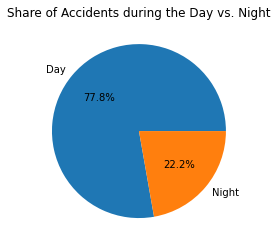

In [14]:
## pie chart for day vs. night share of accidents

accidents_sunlight = time_of_day_data['Sunrise_Sunset'].value_counts()

plt.pie(accidents_sunlight, labels=accidents_sunlight.index.values, autopct="%1.1f%%")
plt.title('Share of Accidents during the Day vs. Night')
plt.savefig("../Images/day_night_accident_share.png")
plt.show()

In order to get a better picture of the distribution, we cut the pie by the hour.

In [15]:
# get an idea of distribution

hour_of_day = time_of_day_data.groupby(["h_start"]).size()

In [16]:
# index by hour of day

time_of_day_by_hour = time_of_day_data.set_index(['h_start'])

In [17]:
# retrieve amount of accidents per hour

zero = len(time_of_day_by_hour.loc[0])
one = len(time_of_day_by_hour.loc[1])
two = len(time_of_day_by_hour.loc[2])
three = len(time_of_day_by_hour.loc[3])
four = len(time_of_day_by_hour.loc[4])
five = len(time_of_day_by_hour.loc[5])
six = len(time_of_day_by_hour.loc[6])
seven = len(time_of_day_by_hour.loc[7])
eight = len(time_of_day_by_hour.loc[8])
nine = len(time_of_day_by_hour.loc[9])
ten = len(time_of_day_by_hour.loc[10])
eleven = len(time_of_day_by_hour.loc[11])
twelve = len(time_of_day_by_hour.loc[12])
thirteen = len(time_of_day_by_hour.loc[13])
fourteen = len(time_of_day_by_hour.loc[14])
fifteen = len(time_of_day_by_hour.loc[15])
sixteen = len(time_of_day_by_hour.loc[16])
seventeen = len(time_of_day_by_hour.loc[17])
eighteen = len(time_of_day_by_hour.loc[18])
nineteen = len(time_of_day_by_hour.loc[19])
twenty = len(time_of_day_by_hour.loc[20])
twenty_one = len(time_of_day_by_hour.loc[21])
twenty_two = len(time_of_day_by_hour.loc[22])
twenty_three = len(time_of_day_by_hour.loc[23])


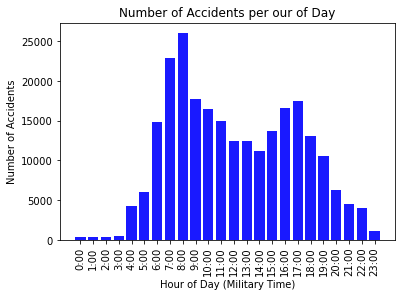

In [18]:
# plot accidents per hour

accidents_by_hours = [zero, one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty_one, twenty_two, twenty_three]
x_axis = np.arange(len(accidents_by_hours))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, accidents_by_hours, color='blue', alpha=.9, align="center")
plt.xticks(tick_locations, ["0:00", "1:00", "2:00", "3:00", "4:00", "5:00", "6:00", "7:00", "8:00", "9:00", "10:00", "11:00", "12:00", "13:00", "14:00", "15:00", "16:00", "17:00", "18:00", "19:00", "20:00", "21:00", "22:00", "23:00"])
plt.xticks(rotation=90)


plt.xlabel("Hour of Day (Military Time)")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents per our of Day")
plt.savefig("../Images/accidents_per_hour.png")
plt.show()

As you can see, the number of data points per hour seem to not only accumulate mostly in the day time (hours of 6:00am to 7:00pm), but they also seem to accumulate further in the early mornings and late afternoon/early evenings.